In [1]:
import os 
import sys
import numpy as np
import pandas as pd
import pickle
import datetime as dt
from datetime import *
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

import networkx

In [2]:
train = np.load('/media/usr/SSD/jiin/naver/data/METR-LA/train.npz')
val = np.load('/media/usr/SSD/jiin/naver/data/METR-LA/val.npz')
test = np.load('/media/usr/SSD/jiin/naver/data/METR-LA/test.npz')

In [3]:
for i in train:
    print(i)

x
y
x_offsets
y_offsets


In [4]:
train['x'].shape, train['y'].shape, test['x'].shape, test['y'].shape

((23974, 12, 207, 2),
 (23974, 12, 207, 2),
 (6850, 12, 207, 2),
 (6850, 12, 207, 2))

In [9]:
train['x'][0][:][0]

array([[64.375     ,  0.        ],
       [67.625     ,  0.        ],
       [67.125     ,  0.        ],
       [61.5       ,  0.        ],
       [66.875     ,  0.        ],
       [68.75      ,  0.        ],
       [65.125     ,  0.        ],
       [67.125     ,  0.        ],
       [59.625     ,  0.        ],
       [62.75      ,  0.        ],
       [55.5       ,  0.        ],
       [66.5       ,  0.        ],
       [64.25      ,  0.        ],
       [68.5       ,  0.        ],
       [60.375     ,  0.        ],
       [67.5       ,  0.        ],
       [37.75      ,  0.        ],
       [63.125     ,  0.        ],
       [59.75      ,  0.        ],
       [62.125     ,  0.        ],
       [67.25      ,  0.        ],
       [41.25      ,  0.        ],
       [54.625     ,  0.        ],
       [58.125     ,  0.        ],
       [65.125     ,  0.        ],
       [64.25      ,  0.        ],
       [61.25      ,  0.        ],
       [62.75      ,  0.        ],
       [66.875     ,

In [8]:
train['x_offsets'], train['y_offsets']

(array([[-11],
        [-10],
        [ -9],
        [ -8],
        [ -7],
        [ -6],
        [ -5],
        [ -4],
        [ -3],
        [ -2],
        [ -1],
        [  0]]),
 array([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10],
        [11],
        [12]]))

In [7]:
val['x_offsets'], val['y_offsets']

(array([[-11],
        [-10],
        [ -9],
        [ -8],
        [ -7],
        [ -6],
        [ -5],
        [ -4],
        [ -3],
        [ -2],
        [ -1],
        [  0]]),
 array([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10],
        [11],
        [12]]))

## Sensor Graph

In [5]:
try:
    with open('/media/usr/SSD/jiin/naver/data/METR-LA/sensor_graph/adj_mx.pkl', 'rb') as f:
        sensor_file = pickle.load(f)
except UnicodeDecodeError as e:
    with open('/media/usr/SSD/jiin/naver/data/METR-LA/sensor_graph/adj_mx.pkl', 'rb') as f:
        sensor_file = pickle.load(f, encoding='latin1')
except Exception as e:
    print('Unable to load data ', 'sensor_graph/adj_mx.pkl', ':', e)

In [6]:
sensor_ids, sensor_id_to_ind, adj_mx = sensor_file

In [7]:
adj_mx.shape, adj_mx

((207, 207),
 array([[1.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 1.       , 0.3909554, ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.7174379, 1.       , ..., 0.       , 0.       ,
         0.       ],
        ...,
        [0.       , 0.       , 0.       , ..., 1.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 1.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         1.       ]], dtype=float32))

In [23]:
sensor_ids

['773869',
 '767541',
 '767542',
 '717447',
 '717446',
 '717445',
 '773062',
 '767620',
 '737529',
 '717816',
 '765604',
 '767471',
 '716339',
 '773906',
 '765273',
 '716331',
 '771667',
 '716337',
 '769953',
 '769402',
 '769403',
 '769819',
 '769405',
 '716941',
 '717578',
 '716960',
 '717804',
 '767572',
 '767573',
 '773012',
 '773013',
 '764424',
 '769388',
 '716328',
 '717819',
 '769941',
 '760987',
 '718204',
 '718045',
 '769418',
 '768066',
 '772140',
 '773927',
 '760024',
 '774012',
 '774011',
 '767609',
 '769359',
 '760650',
 '716956',
 '769831',
 '761604',
 '717495',
 '716554',
 '773953',
 '767470',
 '716955',
 '764949',
 '773954',
 '767366',
 '769444',
 '773939',
 '774067',
 '769443',
 '767750',
 '767751',
 '767610',
 '773880',
 '764766',
 '717497',
 '717490',
 '717491',
 '717492',
 '717493',
 '765176',
 '717498',
 '717499',
 '765171',
 '718064',
 '718066',
 '765164',
 '769431',
 '769430',
 '717610',
 '767053',
 '767621',
 '772596',
 '772597',
 '767350',
 '767351',
 '716571',

In [22]:
sensor_id_to_ind

{'717099': 110,
 '773869': 0,
 '767541': 1,
 '767542': 2,
 '717447': 3,
 '717446': 4,
 '717445': 5,
 '773062': 6,
 '767053': 84,
 '737529': 8,
 '717816': 9,
 '765604': 10,
 '767471': 11,
 '716339': 12,
 '772596': 86,
 '765273': 14,
 '716331': 15,
 '771667': 16,
 '716337': 17,
 '769953': 18,
 '769402': 19,
 '769403': 20,
 '769819': 21,
 '769405': 22,
 '769345': 164,
 '716960': 25,
 '717804': 26,
 '767572': 27,
 '767573': 28,
 '773012': 29,
 '773013': 30,
 '764424': 31,
 '764101': 176,
 '769388': 32,
 '716328': 33,
 '717819': 34,
 '769941': 35,
 '760987': 36,
 '718204': 37,
 '718045': 38,
 '769418': 39,
 '768066': 40,
 '772140': 41,
 '773927': 42,
 '769867': 126,
 '772513': 138,
 '774012': 44,
 '774011': 45,
 '767609': 46,
 '760650': 48,
 '765099': 131,
 '769831': 50,
 '772669': 166,
 '767585': 92,
 '716554': 53,
 '773953': 54,
 '767470': 55,
 '762329': 132,
 '764949': 57,
 '773954': 58,
 '767366': 59,
 '769444': 60,
 '773939': 61,
 '774067': 62,
 '769443': 63,
 '767750': 64,
 '767751': 

In [12]:
from torch_geometric.utils import dense_to_sparse
import torch

dense_to_sparse(torch.Tensor(adj_mx))

(tensor([[  0,   0,   0,  ..., 206, 206, 206],
         [  0,  13,  37,  ..., 187, 198, 206]]),
 tensor([1.0000, 0.2223, 0.5088,  ..., 0.2779, 0.3204, 1.0000]))

In [19]:
dense_to_sparse(torch.Tensor(adj_mx))[0].type()

'torch.LongTensor'

## Incident Simulation Data

In [43]:
upstream = np.where(adj_mx[:, 0] > 0)[0]
downstream = np.where(adj_mx[0] > 0)[0]
upstream, downstream

(array([  0,  13,  36,  58,  67, 114, 115, 116, 118, 143]),
 array([  0,  13,  37,  42,  54, 111, 116, 125, 140, 142, 145, 199]))

In [45]:
up_agg = train['x'][0, :, upstream[1:], 0]
up_agg = up_agg.mean(axis=1)

down_agg = train['x'][0, :, downstream[1:], 0]
down_agg = down_agg.mean(axis=1)

In [48]:
train_x = train['x'][:, :, 0, 0]

23812
20272
21158


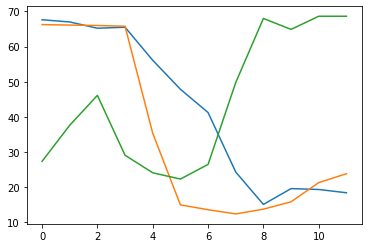

In [62]:
rand = np.random.choice(len(train['x']), 100)
for i in rand:
    if (train_x[i, :].max() - train_x[i, :].min() > 40) & (train_x[i, :].min() > 5):
        plt.plot(train_x[i, :], label=str(i))
        print(i)

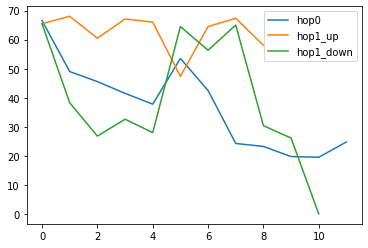

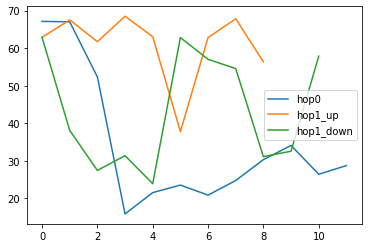

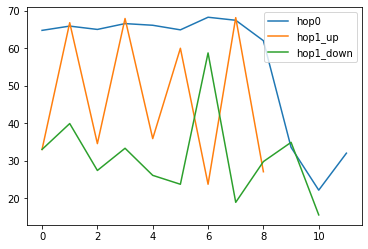

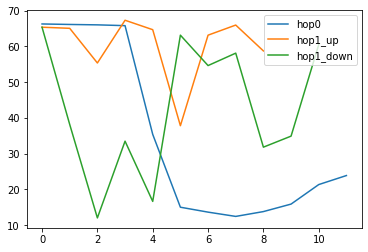

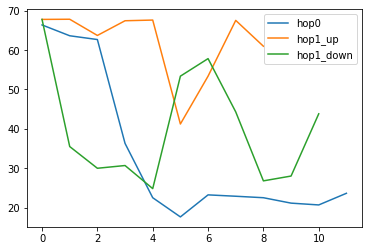

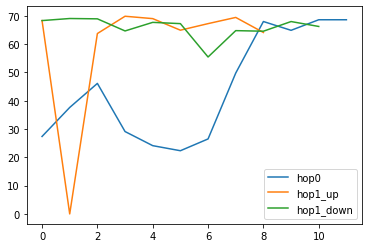

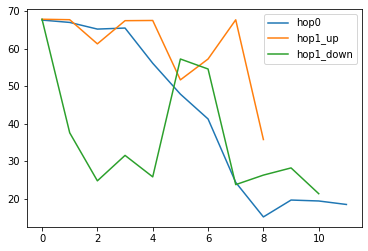

In [63]:
for i in [2211, 18054, 16614, 20272, 21799,21158, 23812]:
    up_agg = train['x'][i, :, upstream[1:], 0].mean(axis=1)
    down_agg = train['x'][i, :, downstream[1:], 0].mean(axis=1)
    plt.figure()
    plt.plot(train_x[i, :], label='hop0')
    plt.plot(up_agg, label='hop1_up')
    plt.plot(down_agg, label='hop1_down')
    plt.legend()
    plt.show()

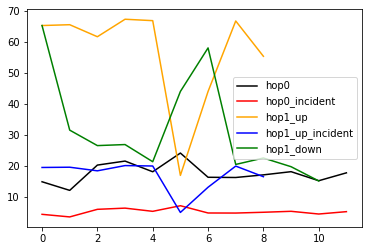

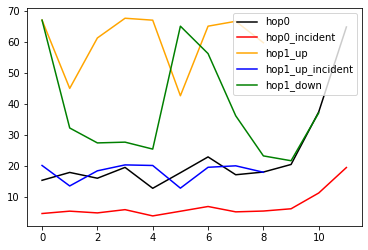

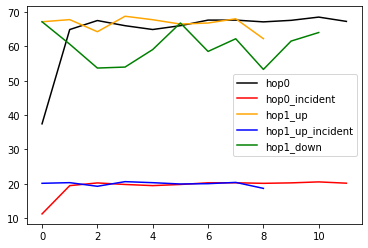

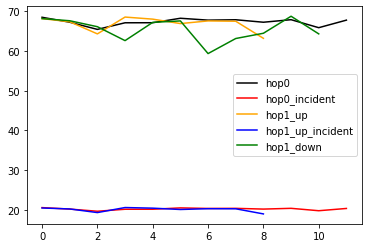

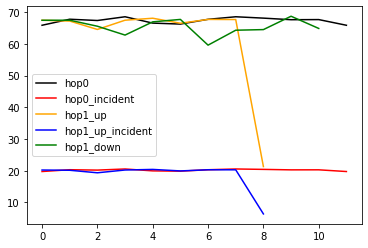

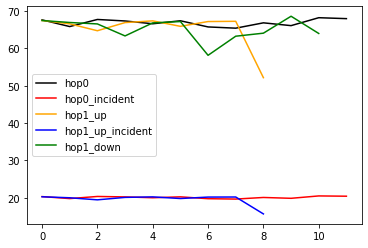

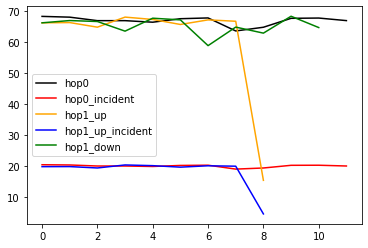

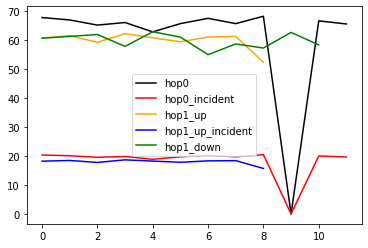

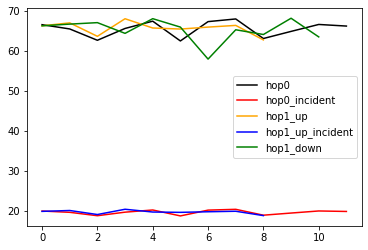

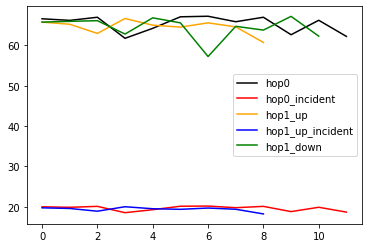

In [70]:
for i in range(500, 600, 10):
    up_agg = train['x'][i, :, upstream[1:], 0].mean(axis=1)
    down_agg = train['x'][i, :, downstream[1:], 0].mean(axis=1)
    plt.figure()
    plt.plot(train_x[i, :], label='hop0', color='k')
    plt.plot(train_x[i, :]*0.3, label='hop0_incident', color='r')
    plt.plot(up_agg, label='hop1_up', color='orange')
    plt.plot(up_agg*0.3, label='hop1_up_incident', color='blue')
    plt.plot(down_agg, label='hop1_down', color='green')
#     plt.plot(down_agg*0.3, label='hop1_down_incident', color='green')
    plt.legend()
    plt.show()

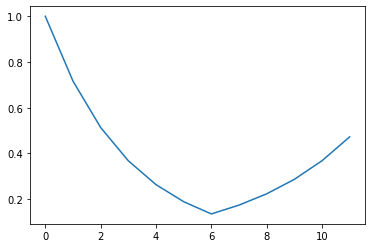

In [20]:
simul_pattern = [np.exp(-i/3) for i in range(6)] + [np.exp(i/4)*np.exp(-2) for i in range(6)]
plt.plot(simul_pattern)

  1%|█                                                                                             | 4/342 [00:11<15:34,  2.77s/it]


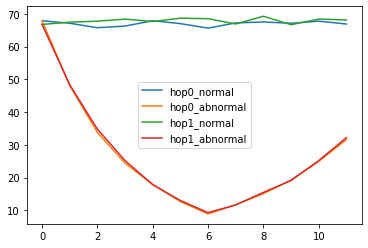

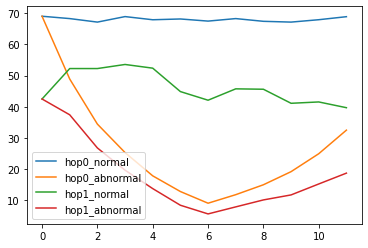

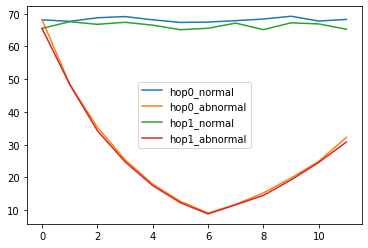

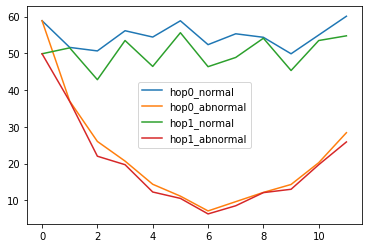

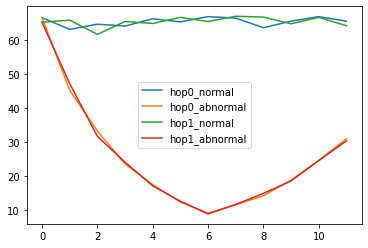

In [34]:
cnt = 0
for ix in tqdm(random_ix):
    n = np.random.choice(num_node, size=10)
    new_test[ix, :, n, 0] = test['x'][ix, :, n, 0] * simul_pattern
    
    upstream = []
    for node in n:
        upstream.extend(np.where(adj_mx[:, node] > 0)[0])
    upstream = list(set(upstream))
    new_test[ix, :, upstream, 0] = test['x'][ix, :, upstream, 0] * simul_pattern
    plt.figure()
    plt.plot(test['x'][ix, :, n[0], 0], label='hop0_normal')
    plt.plot(new_test[ix, :, n[0], 0], label='hop0_abnormal')
    plt.plot(test['x'][ix, :, upstream[0], 0], label='hop1_normal')
    plt.plot(new_test[ix, :, upstream[0], 0], label='hop1_abnormal')
    plt.legend()
    cnt += 1
    if cnt == 5:
        break

#### test set

In [22]:
print(test['x'].shape)
new_test = test['x'].copy()

(6850, 12, 207, 2)


In [147]:
test_len = test['x'].shape[0]
num_node = test['x'].shape[2]
random_ix = np.random.choice(np.arange(test_len), size=int(test_len*0.1))

cnt = 0
for ix in tqdm(random_ix):
    n = np.random.choice(num_node, size=10)
    new_test[ix, :, n, 0] = test['x'][ix, :, n, 0] * simul_pattern
    
    upstream = []
    for node in n:
        upstream.extend(np.where(adj_mx[:, node] > 0)[0])
    upstream = list(set(upstream))
    new_test[ix, :, upstream, 0] = test['x'][ix, :, upstream, 0] * simul_pattern
        
#     plt.figure()
#     plt.plot(test['x'][ix, :, n[0], 0])
#     plt.plot(new_test[ix, :, n[0], 0])
#     plt.plot(test['x'][ix, :, upstream[0], 0])
#     plt.plot(new_test[ix, :, upstream[0], 0])
#     cnt += 1
#     if cnt == 5:
#         break

100%|████████████████████████████████████████████████████████████████████████████████████████████| 685/685 [11:39<00:00,  1.02s/it]


In [171]:
test_label = np.array([int(i in random_ix) for i in range(test_len)])
test_label = np.expand_dims(test_label, -1)

In [174]:
test_label.shape

(6850, 1)

- Save npz (test)

In [175]:
np.savez('/media/usr/SSD/jiin/naver/data/METR-LA/test_anomaly.npz', x=new_test, y=test_label, x_offsets=test['x_offsets'], y_offsets=test['y_offsets'])

#### valid set

In [24]:
print(val['x'].shape)
new_val = val['x'].copy()

(3425, 12, 207, 2)


In [25]:
val_len = val['x'].shape[0]
num_node = val['x'].shape[2]
random_ix = np.random.choice(np.arange(val_len), size=int(val_len*0.1))

cnt = 0
for ix in tqdm(random_ix):
    n = np.random.choice(num_node, size=10)
    new_val[ix, :, n, 0] = val['x'][ix, :, n, 0] * simul_pattern
    
    upstream = []
    for node in n:
        upstream.extend(np.where(adj_mx[:, node] > 0)[0])
    upstream = list(set(upstream))
    new_val[ix, :, upstream, 0] = val['x'][ix, :, upstream, 0] * simul_pattern
        
#     plt.figure()
#     plt.plot(test['x'][ix, :, n[0], 0])
#     plt.plot(new_test[ix, :, n[0], 0])
#     plt.plot(test['x'][ix, :, upstream[0], 0])
#     plt.plot(new_test[ix, :, upstream[0], 0])
#     cnt += 1
#     if cnt == 5:
#         break

100%|████████████████████████████████████████████████████████████████████████████████████████████| 342/342 [02:44<00:00,  2.07it/s]


In [26]:
val_label = np.array([int(i in random_ix) for i in range(val_len)])
val_label = np.expand_dims(val_label, -1)

In [27]:
val_label.shape

(3425, 1)

- Save npz

In [28]:
np.savez('/media/usr/SSD/jiin/naver/data/METR-LA/val_anomaly.npz', x=new_val, y=val_label, x_offsets=test['x_offsets'], y_offsets=test['y_offsets'])

### Load npz

In [176]:
test_anomaly = np.load('/media/usr/SSD/jiin/naver/data/METR-LA/test_anomaly.npz')

In [177]:
test_anomaly['x'].shape

(6850, 12, 207, 2)

In [179]:
test_anomaly['y'].shape

(6850, 1)